# Predicting Life Expectancy

## Move Dataset from Google Drive to Google Colab

### Mount Google Drive

To use the life expectancy dataset on Google Colab, drop the file in Google Drive and then mount your Google Drive account. Probably need to run again this after a session ends.

In [ ]:
# Mount Google Drive in Google Colab
# Might have to run again after a session ends?
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### File Location of Dataset

In [ ]:
# Download Link for the Dataset
  # https://www.kaggle.com/datasets/rachchua/life-expectancy-data?select=Life+Expectancy+Data.csv

# File Path in Google Drive if file is in root directory
  # '/content/drive/MyDrive/Life Expectancy Data.csv'

### Load the Dataset

This needs to be ran again after a session is ended or disconnected

In [ ]:
import pandas as pd

# Adjust the path to where your file is located in your Google Drive if it's not located at root
file_path = '/content/drive/MyDrive/Life Expectancy Data.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,Hepatitis_B,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,Afghanistan,Asia,2000,0,55.8,310.8305,90.5,0.02,10.424960,62,...,24.0,8.20,0.338,24,0.02,148,20.78,2.3,2.5,2.2
1,Afghanistan,Asia,2001,0,56.3,304.8580,87.9,0.02,10.574728,63,...,35.0,7.80,0.340,33,0.02,163,21.61,2.1,2.4,2.2
2,Afghanistan,Asia,2002,0,56.8,298.8855,85.3,0.02,16.887351,64,...,36.0,7.76,0.341,36,0.02,320,22.60,19.9,2.2,2.3
3,Afghanistan,Asia,2003,0,57.3,292.0365,82.7,0.02,11.089053,65,...,41.0,8.82,0.373,41,0.02,332,23.68,19.7,19.9,2.4
4,Afghanistan,Asia,2004,0,57.8,285.1880,80.0,0.02,15.296066,67,...,5.0,8.79,0.381,50,0.02,323,24.73,19.5,19.7,2.5


<Axes: xlabel='Life_expectancy', ylabel='Count'>

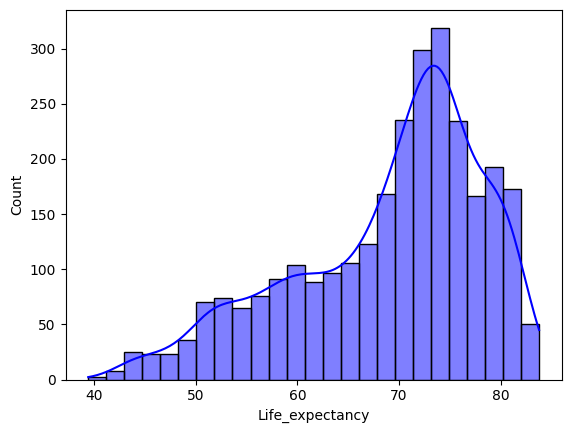

In [ ]:
import seaborn as sns
sns.histplot(df['Life_expectancy'].dropna(), kde=True, color='blue')

<Axes: >

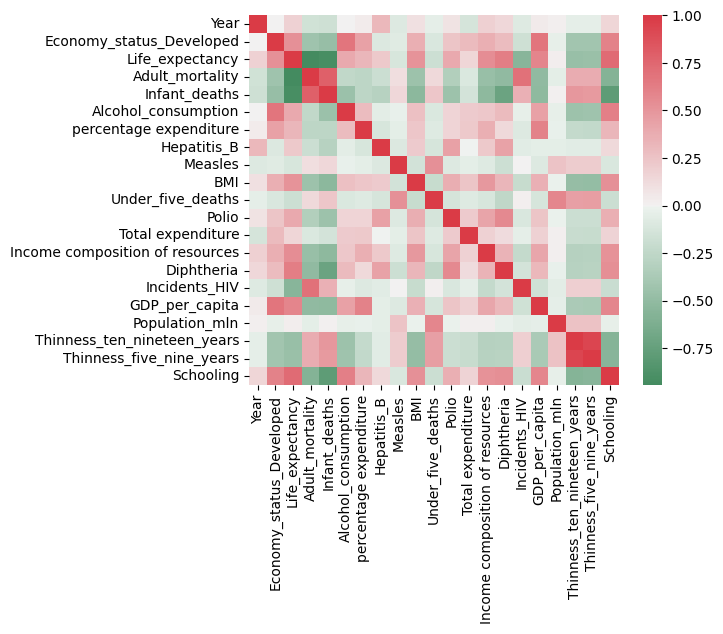

In [ ]:
number_df = df.select_dtypes(include=['number'])

map = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(number_df.corr(), cmap=map, center=0, annot=False, square=True)

## Data Pre-processing

This needs to be ran again after a session ends (need to add cross-validation)

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# First, handle missing values before feature selection
# Create imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Perform imputation on the 'Polio' column, there are five NaN values in 'Polio'
# This is not permanent, and does not actually alter the file.
# It is only applied to the in-memory representation of the dataframe.
df['Polio'] = imputer.fit_transform(df[['Polio']])

# Now, proceed with feature selection
X = df.drop(['Country', 'Region', 'Year', 'Life_expectancy'], axis=1) # Could just try to predict using different/more x variables or use forward selection, backward elimination, and recursive feature elimination
y = df['Life_expectancy']  # Predict Life Expectancy

# Splitting the dataset into training and testing sets (80% as training set and 20% as evaluating set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# At this point, X_train and X_test should have no missing values in 'Polio'
# Check to confirm, if all values are 0, then there are no missing values
print(X_train.isnull().sum()) # Before imputation, there were five NaN values in 'Polio'


Economy_status_Developed           0
Adult_mortality                    0
Infant_deaths                      0
Alcohol_consumption                0
percentage expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total expenditure                  0
Income composition of resources    0
Diphtheria                         0
Incidents_HIV                      0
GDP_per_capita                     0
Population_mln                     0
Thinness_ten_nineteen_years        0
Thinness_five_nine_years           0
Schooling                          0
dtype: int64


## Multiple Linear Regression

**#TODO: Add Cross Validation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


# Initialize and train the linear regression model
linear_reg = LinearRegression()

# Added cross validation
cv_scores = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()

linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # RMSE
mae_linear = mean_absolute_error(y_test, y_pred_linear)  # MAE
r2_linear = r2_score(y_test, y_pred_linear)

# Dont how to interpret this yet
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Linear Regression MAE: {mae_linear}")
print(f"Linear Regression R^2: {r2_linear}")

# Lower values (closer to zero) indicate better performance,
# mean squared error measures the average squared difference between the actual and predicted values.
# these values are already negated, so the fold with the highest (least negative) value is the best performing
print("Cross-Validation Scores:", cv_scores)

# average mean squared error across all cross-validation folds
print("Average Cross-Validation Mean Squared Error:", mse_cv)


Linear Regression MSE: 1.9132232263392914
Linear Regression RMSE: 1.3831931269129742
Linear Regression MAE: 1.0865037403606768
Linear Regression R^2: 0.9776646601956464
Cross-Validation Scores: [-2.10535871 -1.95759777 -2.01564447 -1.87453267 -2.03485825]
Average Cross-Validation Mean Squared Error: 1.9975983757018512


## KNN Regression

**#TODO: Add Cross Validation**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN model - we can tweak the n_neighbors parameter to possibly get a better outcome
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Added cross validation
cv_scores = cross_val_score(knn_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()

knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)  # RMSE
mae_knn = mean_absolute_error(y_test, y_pred_knn)  # MAE
r2_knn = r2_score(y_test, y_pred_knn)

# Dont how to interpret this yet
print(f"KNN MSE: {mse_knn}")
print(f"KNN RMSE: {rmse_knn}")
print(f"KNN MAE: {mae_knn}")
print(f"KNN R^2: {r2_knn}")

# Lower values (closer to zero) indicate better performance,
# mean squared error measures the average squared difference between the actual and predicted values.
# these values are already negated, so the fold with the highest (least negative) value is the best performing
print("Cross-Validation Scores:", cv_scores)

# average mean squared error across all cross-validation folds
print("Average Cross-Validation Mean Squared Error:", mse_cv)

KNN MSE: 18.05551228070176
KNN RMSE: 4.249177835852691
KNN MAE: 2.833438596491229
KNN R^2: 0.7892164403090743
Cross-Validation Scores: [-25.0503886  -16.41742368 -19.47524825 -16.37939077 -18.50505495]
Average Cross-Validation Mean Squared Error: 19.1655012481203


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN model - we can tweak the n_neighbors parameter to possibly get a better outcome
knn_reg2 = KNeighborsRegressor(n_neighbors=3)

# Added cross validation
cv_scores = cross_val_score(knn_reg2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()

knn_reg2.fit(X_train, y_train)

# Predictions
y_pred_knn2 = knn_reg2.predict(X_test)

# Evaluation
mse_knn2 = mean_squared_error(y_test, y_pred_knn2)
rmse_knn2 = np.sqrt(mse_knn2)  # RMSE
mae_knn2 = mean_absolute_error(y_test, y_pred_knn2)  # MAE
r2_knn2 = r2_score(y_test, y_pred_knn2)

# Dont how to interpret this yet
print(f"KNN MSE: {mse_knn2}")
print(f"KNN RMSE: {rmse_knn2}")
print(f"KNN MAE: {mae_knn2}")
print(f"KNN R^2: {r2_knn2}")

# Lower values (closer to zero) indicate better performance,
# mean squared error measures the average squared difference between the actual and predicted values.
# these values are already negated, so the fold with the highest (least negative) value is the best performing
print("Cross-Validation Scores:", cv_scores)

# average mean squared error across all cross-validation folds
print("Average Cross-Validation Mean Squared Error:", mse_cv)

KNN MSE: 17.118645224171544
KNN RMSE: 4.137468455972993
KNN MAE: 2.659239766081872
KNN R^2: 0.8001536084194285
Cross-Validation Scores: [-24.09234893 -15.30203947 -19.17057992 -14.10879121 -18.37492552]
Average Cross-Validation Mean Squared Error: 18.209737010260696


## Decision Tree Regression

**#TODO: Add Cross Validation**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the decision tree model
decision_tree = DecisionTreeRegressor()

# Added cross validation
cv_scores_tree = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv_tree = -cv_scores_tree.mean()

decision_tree.fit(X_train, y_train)

# Predictions
y_pred_tree = decision_tree.predict(X_test)

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)  # RMSE
mae_tree = mean_absolute_error(y_test, y_pred_tree)  # MAE
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree RMSE: {rmse_tree}")
print(f"Decision Tree MAE: {mae_tree}")
print(f"Decision Tree R^2: {r2_tree}")

# Lower values (closer to zero) indicate better performance,
# mean squared error measures the average squared difference between the actual and predicted values.
# these values are already negated, so the fold with the highest (least negative) value is the best performing
print("Cross-Validation Scores:", cv_scores_tree)

# average mean squared error across all cross-validation folds
print("Average Cross-Validation Mean Squared Error:", mse_cv_tree)


Decision Tree MSE: 1.022280701754386
Decision Tree RMSE: 1.0110789789894685
Decision Tree MAE: 0.6428070175438596
Decision Tree R^2: 0.9880656963940349
Cross-Validation Scores: [-1.29629386 -1.19449561 -0.97901316 -0.90797802 -1.0143956 ]
Average Cross-Validation Mean Squared Error: 1.0784352515905145


Decision Tree with Selected Features MSE: 27.43997995982018
Decision Tree with Selected Features RMSE: 5.238318428639117
Decision Tree with Selected Features MAE: 3.3960025062656642
Decision Tree with Selected Features R^2: 0.6796603406284654
Cross-Validation Scores with Selected Features: [-27.02794622 -23.31937392 -28.72011148 -22.36312639 -21.9902498 ]
Average Cross-Validation Mean Squared Error with Selected Features: 24.68416156146539


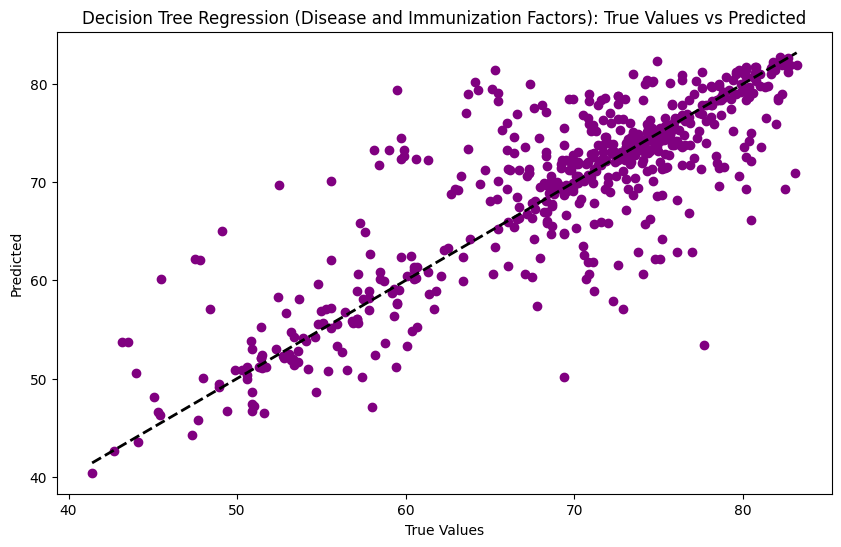

In [ ]:
# Selecting only the relevant features
selected_features = ['Measles', 'Incidents_HIV', 'Hepatitis_B', 'Polio', 'Diphtheria']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and train the decision tree model
decision_tree_selected = DecisionTreeRegressor()

# Added cross validation
cv_scores_tree_selected = cross_val_score(decision_tree_selected, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv_tree_selected = -cv_scores_tree_selected.mean()

decision_tree_selected.fit(X_train_selected, y_train)

# Predictions
y_pred_tree_selected = decision_tree_selected.predict(X_test_selected)

# Evaluation
mse_tree_selected = mean_squared_error(y_test, y_pred_tree_selected)
rmse_tree_selected = np.sqrt(mse_tree_selected)  # RMSE
mae_tree_selected = mean_absolute_error(y_test, y_pred_tree_selected)  # MAE
r2_tree_selected = r2_score(y_test, y_pred_tree_selected)

print(f"Decision Tree with Selected Features MSE: {mse_tree_selected}")
print(f"Decision Tree with Selected Features RMSE: {rmse_tree_selected}")
print(f"Decision Tree with Selected Features MAE: {mae_tree_selected}")
print(f"Decision Tree with Selected Features R^2: {r2_tree_selected}")

# Lower values (closer to zero) indicate better performance,
# mean squared error measures the average squared difference between the actual and predicted values.
# these values are already negated, so the fold with the highest (least negative) value is the best performing
print("Cross-Validation Scores with Selected Features:", cv_scores_tree_selected)

# average mean squared error across all cross-validation folds
print("Average Cross-Validation Mean Squared Error with Selected Features:", mse_cv_tree_selected)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree_selected, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression (Disease and Immunization Factors): True Values vs Predicted')
plt.show()


Decision Tree with Selected Features MSE: 16.774473684210527
Decision Tree with Selected Features RMSE: 4.095665230974149
Decision Tree with Selected Features MAE: 2.4085964912280704
Decision Tree with Selected Features R^2: 0.8041715338711937
Cross-Validation Scores with Selected Features: [-18.67997807 -21.88083333 -17.66653509 -18.17632967 -20.11072527]
Average Cross-Validation Mean Squared Error with Selected Features: 19.302880287256603


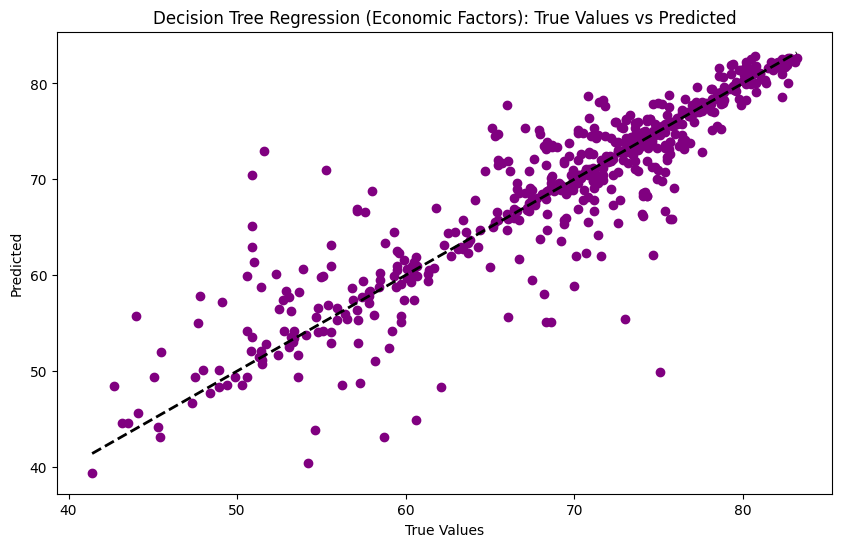

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Selecting the features
selected_features = ['percentage expenditure', 'GDP_per_capita', 'Total expenditure', 'Income composition of resources', 'Economy_status_Developed']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and train the decision tree model with selected features
decision_tree_selected = DecisionTreeRegressor()

cv_scores_tree_selected = cross_val_score(decision_tree_selected, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv_tree_selected = -cv_scores_tree_selected.mean()

decision_tree_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_tree_selected = decision_tree_selected.predict(X_test_selected)

# Evaluate the model
mse_tree_selected = mean_squared_error(y_test, y_pred_tree_selected)
rmse_tree_selected = np.sqrt(mse_tree_selected)
mae_tree_selected = mean_absolute_error(y_test, y_pred_tree_selected)
r2_tree_selected = r2_score(y_test, y_pred_tree_selected)

print(f"Decision Tree with Selected Features MSE: {mse_tree_selected}")
print(f"Decision Tree with Selected Features RMSE: {rmse_tree_selected}")
print(f"Decision Tree with Selected Features MAE: {mae_tree_selected}")
print(f"Decision Tree with Selected Features R^2: {r2_tree_selected}")
print("Cross-Validation Scores with Selected Features:", cv_scores_tree_selected)

# average mean squared error across all cross-validation folds
print("Average Cross-Validation Mean Squared Error with Selected Features:", mse_cv_tree_selected)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree_selected, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression (Economic Factors): True Values vs Predicted')
plt.show()

Decision Tree with Selected Features MSE: 33.65499122807018
Decision Tree with Selected Features RMSE: 5.80129220330007
Decision Tree with Selected Features MAE: 3.0398245614035084
Decision Tree with Selected Features R^2: 0.6071050911138262
Cross-Validation Scores with Selected Features: [-33.58839994 -32.28712763 -26.92762061 -26.23505766 -31.5008444 ]
Average Cross-Validation Mean Squared Error with Selected Features: 30.10781004692643


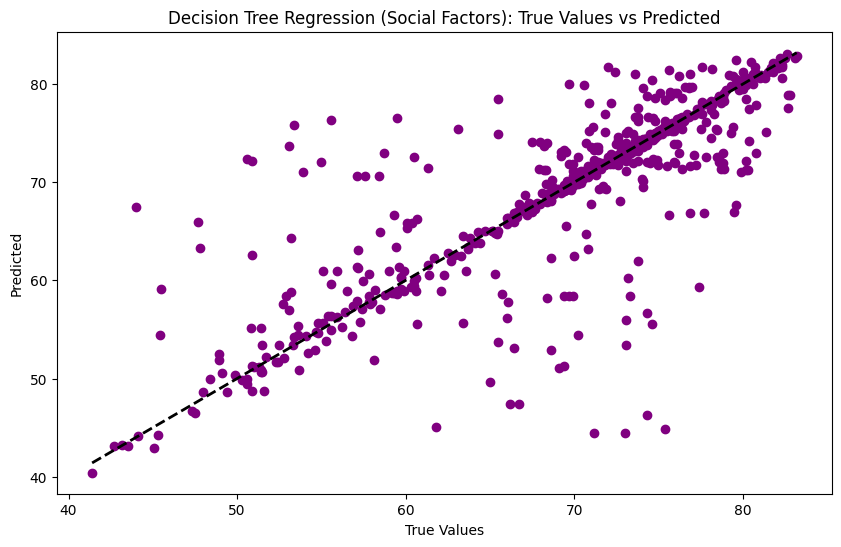

In [ ]:
# Selecting only the relevant features
selected_features = ['BMI', 'Alcohol_consumption', 'Schooling']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and train the decision tree model
decision_tree_selected = DecisionTreeRegressor()

# Added cross validation
cv_scores_tree_selected = cross_val_score(decision_tree_selected, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv_tree_selected = -cv_scores_tree_selected.mean()

decision_tree_selected.fit(X_train_selected, y_train)

# Predictions
y_pred_tree_selected = decision_tree_selected.predict(X_test_selected)

# Evaluation
mse_tree_selected = mean_squared_error(y_test, y_pred_tree_selected)
rmse_tree_selected = np.sqrt(mse_tree_selected)  # RMSE
mae_tree_selected = mean_absolute_error(y_test, y_pred_tree_selected)  # MAE
r2_tree_selected = r2_score(y_test, y_pred_tree_selected)

print(f"Decision Tree with Selected Features MSE: {mse_tree_selected}")
print(f"Decision Tree with Selected Features RMSE: {rmse_tree_selected}")
print(f"Decision Tree with Selected Features MAE: {mae_tree_selected}")
print(f"Decision Tree with Selected Features R^2: {r2_tree_selected}")

# Lower values (closer to zero) indicate better performance,
# mean squared error measures the average squared difference between the actual and predicted values.
# these values are already negated, so the fold with the highest (least negative) value is the best performing
print("Cross-Validation Scores with Selected Features:", cv_scores_tree_selected)

# average mean squared error across all cross-validation folds
print("Average Cross-Validation Mean Squared Error with Selected Features:", mse_cv_tree_selected)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree_selected, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression (Social Factors): True Values vs Predicted')
plt.show()


## Graphs

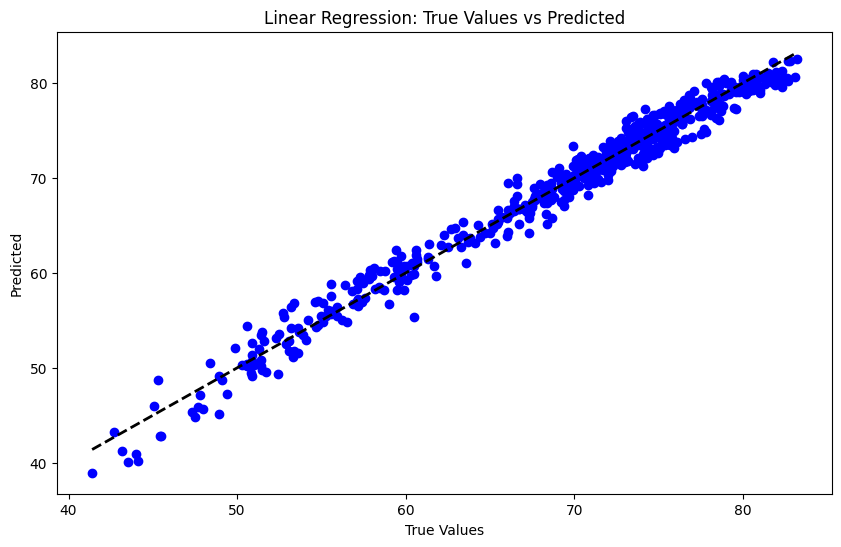

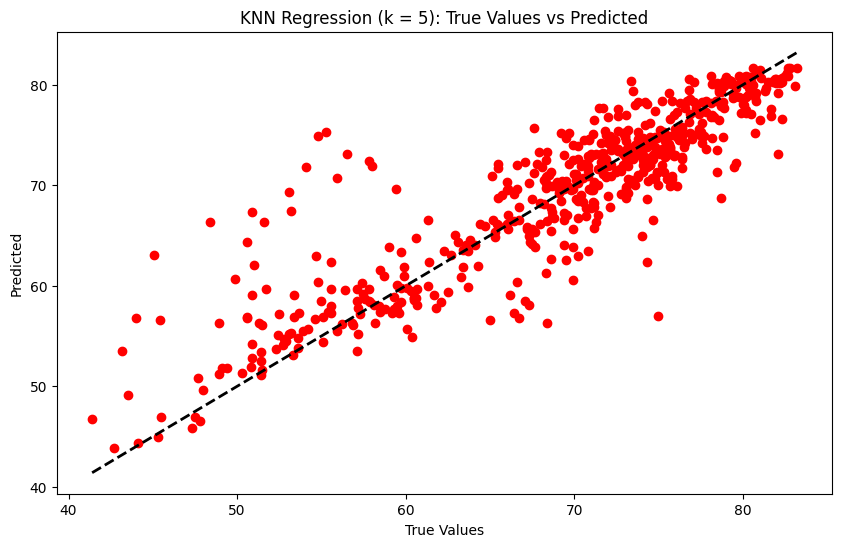

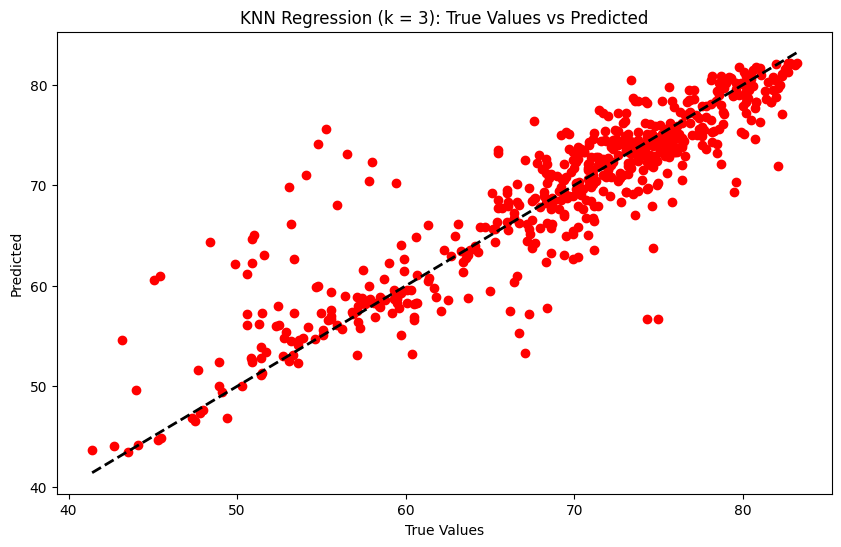

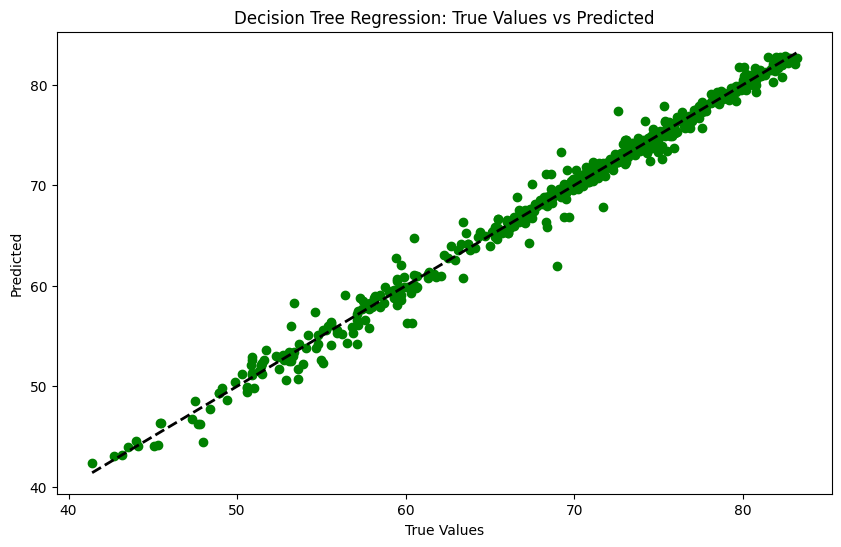

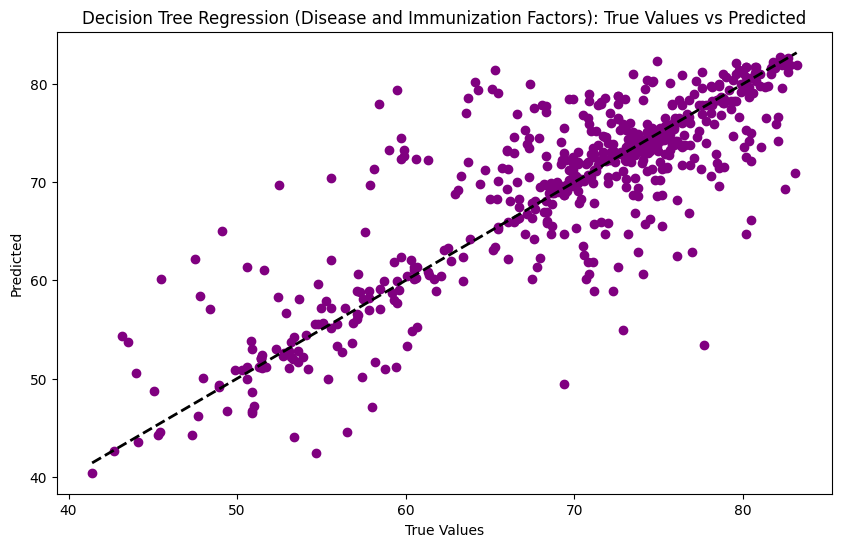

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('Linear Regression: True Values vs Predicted')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('KNN Regression (k = 5): True Values vs Predicted')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn2, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('KNN Regression (k = 3): True Values vs Predicted')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression: True Values vs Predicted')
plt.show()


## Evaluate Performance of Training Models

From Project Proposal: In order to evaluate the performance of each training model, we will use the values of r-squared and the mean squared error to determine the most accurate model.

## Compare Multiple Linear Regression, KNN Regression, and Decision Tree Regression

## Project Milestone Update

Data: Does your group obtain the necessary data?

We have obtained the necessary data for our project.

Learning method: Does your group find/build the code for the learning method you will train on the data?

We are currently building the code for the learning methods, which will then be used to train the data. We have written code for two of the algorithms that we intend to use.

Experiment: Does your group make a plan to run the experiment? Do you have metrics appropriate for your problem? You should plan to use cross-validation in your experiment.

We do have a plan to run the experiment. We will train the models on our data, and then evaluate the performance of each model. Cross-validation will be utilized. As for the metrics that will be utilized in our project, we will use the values of r-squared and the mean squared error to determine the most accurate model.

Timeline: Is there anything else that might affect the progress of the project? Is the project on track in terms of time?

For the most part, I think we are on track in terms of time. Once we complete the learning formulation part, we will proceed to train the data and analyze our results. If we run into coding errors, that might affect the progress of the project.

##Google Slides for Presentation

Link: https://docs.google.com/presentation/d/1fWIwz2z1ByUdYT3dwb-rhRp8QEIISoS-yaLxM4YcKpI/edit?usp=sharing

## Final Project Report

https://docs.google.com/document/d/1lzuHYjkT_AJybgJfxTe3X9BGNG1bltdXBWI8Q4oA4NI/edit?usp=sharing